In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def feature_normalize(X):
    """Return normalized X, arrays of mean and standard deviations of columns in X"""
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_norm = (X - mean)/std
    return X_norm, mean, std

In [3]:
def choose_k(S, var_left = 0.95):
    """Return the smallest k for which var_left * 100% of variance retained"""
    for k in range(len(S)):
        total_var = sum(S[:k])/sum(S)
        if total_var >= var_left:
            return k, total_var    

In [4]:
def pca_func(X, var_left=0.95):
    m = X.shape[0]
    sigma = 1 / (m-1) * np.dot(X.T, X)
    U, S, V = np.linalg.svd(sigma)
    if X.shape[1] == 2: 
        k, var_retained = 1, S[0]/sum(S)
    else: 
        k, var_retained = choose_k(S, var_left)
    U_reduce = U[:, :k]
    z = np.dot(X_norm, U_reduce)
    X_restored = np.dot(U_reduce, z.T).T
    return X, z, X_restored, mean, std, U, S, k, var_retained

# PCA 2D to 1D

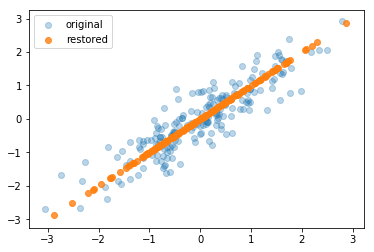

In [5]:
#generate data points
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

X_norm, mean, std = feature_normalize(X)
X_norm, z, X_restored, mean_values, std_values, eigvectors, eigvalues, k, var_retained = pca_func(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha = 0.3)
plt.scatter(X_restored[:, 0], X_restored[:, 1], alpha = 0.8)
plt.legend(['original', 'restored'])
plt.show()

In [6]:
print('Eigenvectors:\n', eigvectors)
print('Eigenvalues:\n', eigvalues)

Eigenvectors:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues:
 [ 1.89888438  0.11116588]


In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

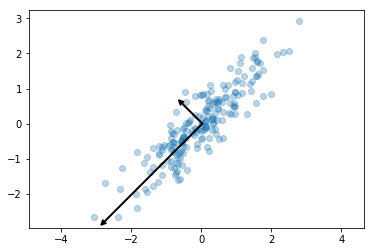

In [8]:
# plot data and eigenvectors
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.3)
for length, vector in zip(eigvalues, eigvectors):
    v = vector * 3 * np.sqrt(length)
    draw_vector(mean, mean + v)
plt.axis('equal');

# Sklearn implementation

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_norm);

In [10]:
print('Eigenvectors:\n', pca.components_)
print('Eigenvalues:\n', pca.explained_variance_)

Eigenvectors:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues:
 [ 1.89888438  0.11116588]


In [11]:
pca = PCA(n_components=1)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

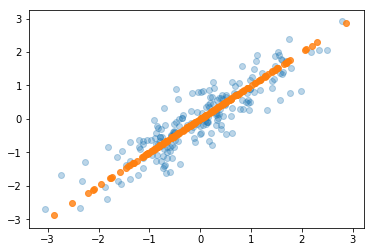

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8);

# PCA nD case

In [13]:
# generate 200 poins with 10 features
n = 10
rng = np.random.RandomState(1)
X = np.dot(rng.rand(n, n), rng.randn(n, 200)).T

X_norm, mean, std = feature_normalize(X)

X_norm, z, X_restored, mean_values, std_values, eigvectors, eigvalues, k, var_retained = pca_func(X_norm)
print('We should left {} features out of {} in order to {:.2%} of variance was retained'.format(k, n, var_retained))
print('Eigenvalues:\n', eigvalues)

We should left 5 features out of 10 in order to 95.94% of variance was retained
Eigenvalues:
 [  7.92331590e+00   5.47240712e-01   4.38863652e-01   4.05666353e-01
   3.27082139e-01   2.18613339e-01   1.17355251e-01   6.13945783e-02
   7.25569028e-03   3.46364256e-03]
